In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
df = pd.read_csv("cleaned_cardio_data.csv")

In [12]:
X = df.drop(['id', 'cardio'], axis=1)
y = df['cardio']

print("Özellikler (X):")
X.head()

Özellikler {X}:


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.4,Erkek,168,62.0,110,80,1,1,0,0,1
1,55.4,Kadın,156,85.0,140,90,3,1,0,0,1
2,51.7,Kadın,165,64.0,130,70,3,1,0,0,0
3,48.3,Erkek,169,82.0,150,100,1,1,0,0,1
4,47.9,Kadın,156,56.0,100,60,1,1,0,0,0


In [14]:
X = pd.get_dummies(X, drop_first=True)

print("Dönüştürülmüş Özellikler (X):")
X.head()

Dönüştürülmüş Özellikler (X):


,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,gender_Kadın
0,50.4,168,62.0,110,80,1,1,0,0,1,False
1,55.4,156,85.0,140,90,3,1,0,0,1,True
2,51.7,165,64.0,130,70,3,1,0,0,0,True
3,48.3,169,82.0,150,100,1,1,0,0,1,False
4,47.9,156,56.0,100,60,1,1,0,0,0,True


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Eğitim seti boyutu (X_train):", X_train.shape)
print("Test seti boyutu (X_test):", X_test.shape)

Eğitim seti boyutu (X_train): (54917, 11)
Test seti boyutu (X_test): (13730, 11)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("Veri başarıyla ölçeklendirildi.")

Veri başarıyla ölçeklendirildi.


In [24]:
log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train_scaled, y_train)

print("Lojistik Regresyon modeli ölçeklenmiş veri ile başarıyla eğitildi.")

Lojistik Regresyon modeli ölçeklenmiş veri ile başarıyla eğitildi.


In [26]:
y_pred = log_reg.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Modelin Doğruluk Oranı: {accuracy:.2f}")
print("-" * 30)

print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))
print("-" * 30)

print("Hata Matrisi (Confusion Matrix):")
print(confusion_matrix(y_test, y_pred))

Modelin Doğruluk Oranı: 0.73
------------------------------
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      6781
           1       0.77      0.66      0.71      6949

    accuracy                           0.73     13730
   macro avg       0.73      0.73      0.72     13730
weighted avg       0.73      0.73      0.72     13730

------------------------------
Hata Matrisi (Confusion Matrix):
[[5376 1405]
 [2361 4588]]


In [28]:
from sklearn.ensemble import RandomForestClassifier

# --- 1. Modeli Oluşturma ve Eğitme ---
print("Random Forest modeli eğitiliyor...")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

print("Model başarıyla eğitildi.")
print("-" * 30)

# --- 2. Tahmin ve Değerlendirme ---
y_pred_rf = rf_model.predict(X_test)

# Performans metrikleri
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Modelinin Doğruluk Oranı: {accuracy_rf:.2f}")
print("-" * 30)
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_rf))
print("-" * 30)
print("Hata Matrisi (Confusion Matrix):")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest modeli eğitiliyor...
Model başarıyla eğitildi.
------------------------------
Random Forest Modelinin Doğruluk Oranı: 0.71
------------------------------
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.70      0.73      0.71      6781
           1       0.72      0.69      0.71      6949

    accuracy                           0.71     13730
   macro avg       0.71      0.71      0.71     13730
weighted avg       0.71      0.71      0.71     13730

------------------------------
Hata Matrisi (Confusion Matrix):
[[4947 1834]
 [2154 4795]]


In [30]:
from xgboost import XGBClassifier

# --- 1. Modeli Oluşturma ve Eğitme ---
print("XGBoost modeli eğitiliyor...")

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb_model.fit(X_train, y_train)

print("Model başarıyla eğitildi.")
print("-" * 30)

# --- 2. Tahmin ve Değerlendirme ---
y_pred_xgb = xgb_model.predict(X_test)

# Performans metrikleri
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Modelinin Doğruluk Oranı: {accuracy_xgb:.2f}")
print("-" * 30)
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_xgb))
print("-" * 30)
print("Hata Matrisi (Confusion Matrix):")
print(confusion_matrix(y_test, y_pred_xgb))

XGBoost modeli eğitiliyor...
Model başarıyla eğitildi.
------------------------------
XGBoost Modelinin Doğruluk Oranı: 0.73
------------------------------
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6781
           1       0.76      0.69      0.72      6949

    accuracy                           0.73     13730
   macro avg       0.73      0.73      0.73     13730
weighted avg       0.74      0.73      0.73     13730

------------------------------
Hata Matrisi (Confusion Matrix):
[[5290 1491]
 [2183 4766]]


C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:03:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


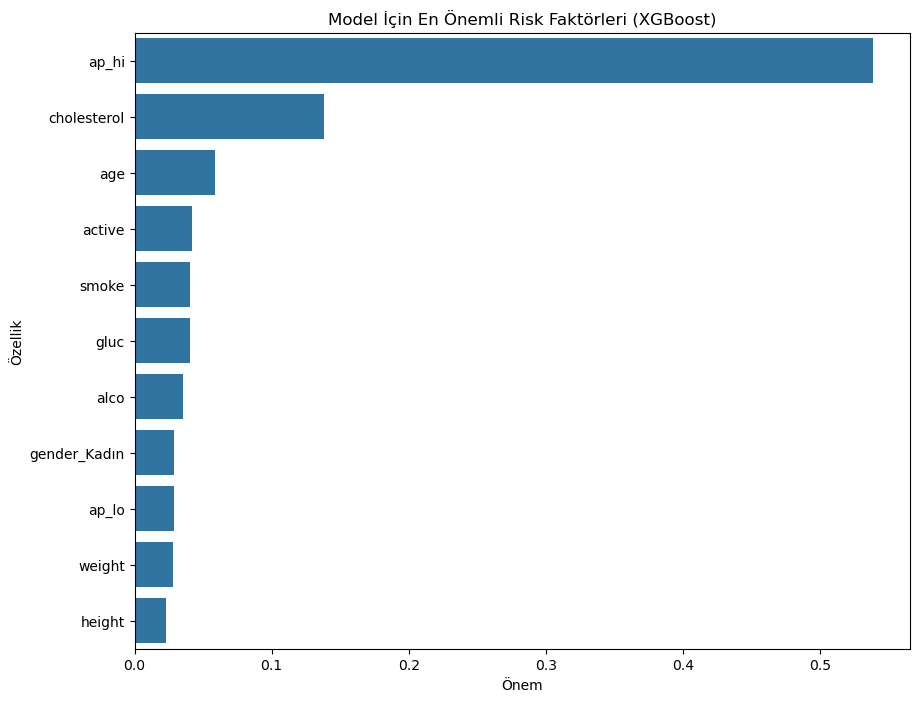

Özellik önemleri 'feature_importance.csv' dosyasına kaydedildi.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = xgb_model.feature_importances_

importance_df = pd.DataFrame({
    'Özellik': X_train.columns,
    'Önem': feature_importances
})

importance_df = importance_df.sort_values(by='Önem', ascending=False)

# Sonuçları görselleştir
plt.figure(figsize=(10, 8))
sns.barplot(x='Önem', y='Özellik', data=importance_df)
plt.title('Model İçin En Önemli Risk Faktörleri (XGBoost)')
plt.show()

importance_df.to_csv('feature_importance.csv', index=False)
print("Özellik önemleri 'feature_importance.csv' dosyasına kaydedildi.")